# Magic i Vidget u IPython-u

Osim biblioteka komandi koje smo videli u prethodnoj radnoj svesci Moduli, IPython poseduje i tzv. magične komande. Lista svih takvih komandi dobija se unosom magične komande
```python
%lsmagic 
```

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

Objašnjenje pojedinačne komande dobija se dodavanjem znaka pitanja (?) posle njenog poziva. Izlaz se kreira u posebnom prozoru.

In [2]:
%timeit?

In [3]:
%%timeit?

In [4]:
%matplotlib?

In [5]:
%%latex?

In [6]:
%clear?

In [7]:
%cls?

In [8]:
%who?

In [9]:
%whos?

Pomoć u sintaksi dobija se tasterom Tab. Kada otpočnete kucanje nečega i pritisnete **Tab** na tastaturi, Ipython daje listu predloga na osnovu otkucanog. Ovakva pomoć odnosi se na Python funkcije, promenljive, magične komande, fajlove i drugo.
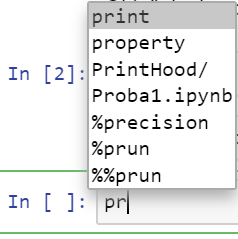

IPython poseduje opciju dodavanja interaktivnih grafičkih elemenata -[vidžeta](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html). U njih spadaju dugmići, klizači, padajući meniji, interaktivni grafici, filmovi itd. U ovom trenutku vidžeti još uvek spadaju u eksperimentalnu funkcionalnost, ali ćemo ih upotrebljavati u okviru kursa. Upoznaćemo numerički klizač kroz primere.


**Primer 1.** Upotrebićemo definisanu funkciju **kvadriranje** iz radne sveske Moduli i učinićemo je interaktivnom. Funkcija [interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) koristi se za definisane funkcije narebom **def**, kako bi se lakše pratilo njeno ponašanje u zavisnosti od promene jednog ili više argumenata. 

In [10]:
from ipywidgets import interact  #učitavanje widget funkcije za interaktivnost
@interact(x=(0,5))       #postavljamo vidžet za kontrolu ulaznih vrednosti funkcije
# x se kreće u opsegu od 0 do 5 celobrojnih vrednosti
def kvadriranje(x):
    print("Kvadrat broja %d je broj %d" % (x,x*x))

interactive(children=(IntSlider(value=2, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

**Primer 2.** Definisaćemo funkciju koja vraća vrednost $e^x$ interaktivno sa promenom vrednosti promenljive $x.$ Upotrebićemo [LaTex](https://link.springer.com/content/pdf/bbm%3A978-1-4842-3913-1%2F1.pdf) formatiranje izlaza.

In [11]:
from ipywidgets import interact     #učitavanje widget funkcije za interaktivnost
from math import exp                #učitavanje math eksponencijalne funkcije
from IPython.display import Latex, Math   #učitavanje opcije za LaTex prikaz teksta
@interact(x=(0,3,0.1),value=1)      # x se kreće u opsegu od 0 do 3 sa korakom 0.1. Početna vrednost je 1.
def eksponent(x):
    izlaz=exp(x)
    display(Latex('$e^x= %3.3f$' %izlaz))
    display(Math('e^x= %3.3f' %izlaz))

interactive(children=(FloatSlider(value=1.0, description='x', max=3.0), Output()), _dom_classes=('widget-inter…

**Primer 3.** Uporedićemo rezultat prilikom izračunavanja vrednosti izraza $S=\displaystyle\sum_{i=1}^{max}\frac1i$ na dva načina. Simbolom $s=\displaystyle\sum_{i=1}^{max}\frac1{max+1-i}$ označićemo isti izraz sa obrnutim redosledom sabiranja. Pratićemo uticaj aritmetike u konačnoj preciznosti na razliku između vrednosti $S$ i $s$ u zavisnosti od broja sabiraka $max.$

In [12]:
from ipywidgets import interact

@interact(maks=(100,1000001,100))
def greška(maks):
    S=sum(1.0/i for i in range(1,maks))
    s=sum(1.0/i for i in range(maks-1,0,-1))
    print(S-s)

interactive(children=(IntSlider(value=500000, description='maks', max=1000001, min=100, step=100), Output()), …

**Primer 4.** Uporedićemo Python vrednost funkcije $\sin(x)$ sa aproksimacijom koja se dobija Maklorenovim razvojem stepena $n$ u zavisnosti od veličine stepena i bliskosti tačke $x$ nuli.

In [15]:
from ipywidgets import interact
from math import sin, factorial
@interact(x=(-0.5,0.5,0.1),n=(1,16,2))
def SinMakl(x,n):
    S=sum(((-1)**(i//2))*(x**i)/factorial(i) for i in range(1,n,2))
    print('Greška aproksimacije iznosi %3.3e' %(sin(x)-S))

interactive(children=(FloatSlider(value=0.0, description='x', max=0.5, min=-0.5), IntSlider(value=7, descripti…